In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import torch
sns.set()

import linear_regression

<Axes: >

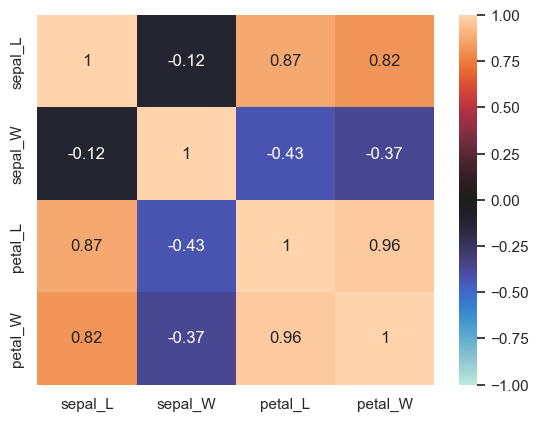

In [4]:
data, _ = datasets.load_iris(return_X_y=True)
df = pd.DataFrame(data, columns=["sepal_L", "sepal_W", "petal_L", "petal_W"])
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="icefire")

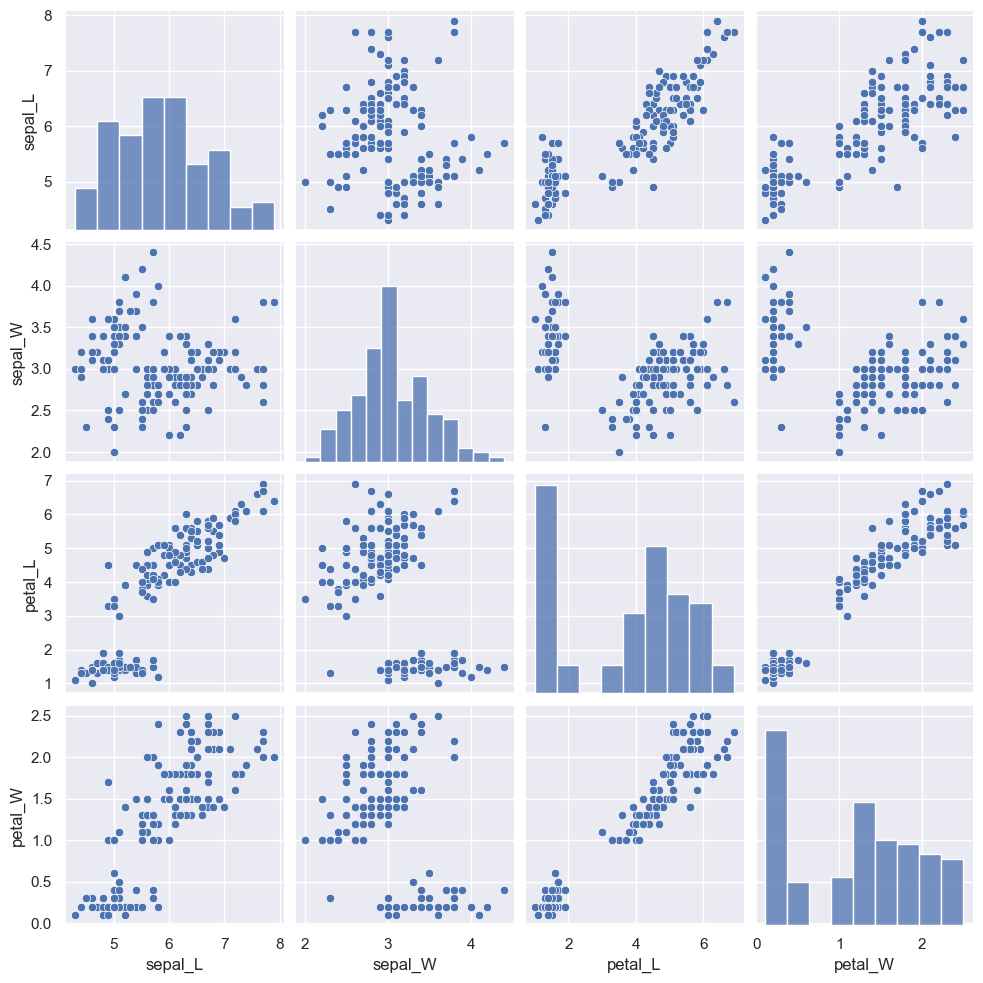

In [5]:
sns.pairplot(df)

In [9]:
model = linear_regression.train_simple_regression(epochs=2000)

epoch 0001/2000 train loss: 86.65304145812988
                val loss: 78.41586074829101
epoch 0045/2000 train loss: 2.092392929115643
                val loss: 2.0722390989462536
epoch 0089/2000 train loss: 1.9626195487876734
                val loss: 2.0873288333415987
epoch 0133/2000 train loss: 1.861209469785293
                val loss: 1.9924934566020966
epoch 0177/2000 train loss: 1.7574880550305048
                val loss: 1.9016169036428134
epoch 0221/2000 train loss: 1.6600783761590718
                val loss: 1.8132392436265945
epoch 0265/2000 train loss: 1.5681278084404766
                val loss: 1.7258117362856864
epoch 0309/2000 train loss: 1.4824229265097528
                val loss: 1.651408838480711
epoch 0353/2000 train loss: 1.4061112286484179
                val loss: 1.5860599557558694
epoch 0397/2000 train loss: 1.3321116479113697
                val loss: 1.5332712570826212
epoch 0441/2000 train loss: 1.2639458616574606
                val loss: 1.4606438040

In [10]:
x_train, y_train, x_test, y_test = linear_regression.get_train_test_loaders(linear_regression._SIMPLE, return_raw_data=True)

0.9970104853312175

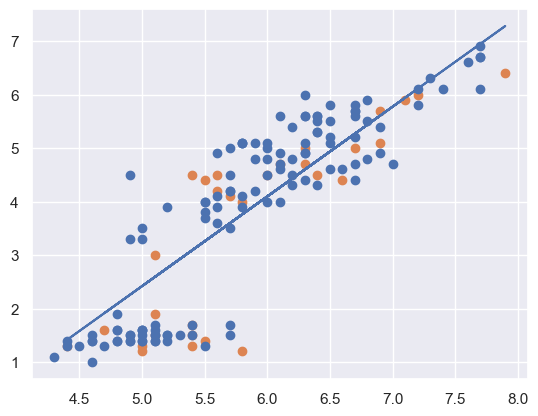

In [11]:
y_pred = x_test * model.linear.weight.item() + model.linear.bias.item()
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, c="C1")
plt.scatter(x_train, y_train, c="C0")
((y_test - y_pred)**2).sum() / len(y_test)

In [12]:
model = linear_regression.train_multiple_regression(epochs=2000)

epoch 0001/2000 train loss: 28.39690260887146
                val loss: 22.78126573562622
epoch 0045/2000 train loss: 2.379994666886826
                val loss: 2.6366261343161264
epoch 0089/2000 train loss: 1.7589635505030552
                val loss: 1.8946634421745936
epoch 0133/2000 train loss: 1.2529732108892253
                val loss: 1.3093175361553828
epoch 0177/2000 train loss: 0.9127636179327965
                val loss: 0.8869757413864136
epoch 0221/2000 train loss: 0.6848216434940696
                val loss: 0.6097831192115942
epoch 0265/2000 train loss: 0.563799993880093
                val loss: 0.45442612705131374
epoch 0309/2000 train loss: 0.5068743293949713
                val loss: 0.37277631064256034
epoch 0353/2000 train loss: 0.4771424998839696
                val loss: 0.3365033139785131
epoch 0397/2000 train loss: 0.4632833020295948
                val loss: 0.3169527101020018
epoch 0441/2000 train loss: 0.45923468212907514
                val loss: 0.307464

In [2]:
model = linear_regression.train_multivariate_regression(epochs=2000)

epoch 0001/2000 train loss: 33.27751377423604
                val loss: 28.5206605275472
epoch 0045/2000 train loss: 1.5970323850711188
                val loss: 1.6641696080565453
epoch 0089/2000 train loss: 1.2283094150324663
                val loss: 1.2279166996479034
epoch 0133/2000 train loss: 0.9098060386255383
                val loss: 0.85518428410093
epoch 0177/2000 train loss: 0.6786310727397601
                val loss: 0.5916312267382939
epoch 0221/2000 train loss: 0.5275050435215235
                val loss: 0.4102875446279844
epoch 0265/2000 train loss: 0.4324247023711602
                val loss: 0.30183351077139375
epoch 0309/2000 train loss: 0.38318650734921295
                val loss: 0.24114281684160233
epoch 0353/2000 train loss: 0.35515683827300865
                val loss: 0.20781353563070298
epoch 0397/2000 train loss: 0.34237628237654766
                val loss: 0.1930079372599721
epoch 0441/2000 train loss: 0.33502931165664146
                val loss: 0.185

In [5]:
model = linear_regression.train_polynomial_regression(epochs=2000)

epoch 0001/2000 train loss: 2530.5731541951495
                val loss: 1971.5974283854166
epoch 0045/2000 train loss: 6.079404287785292
                val loss: 6.675104935963948
epoch 0089/2000 train loss: 2.142607844993472
                val loss: 2.2019138981898627
epoch 0133/2000 train loss: 1.174131878465414
                val loss: 1.8543271998564401
epoch 0177/2000 train loss: 1.082202356060346
                val loss: 1.177218922972679
epoch 0221/2000 train loss: 1.0765051152557135
                val loss: 1.4492492953936258
epoch 0265/2000 train loss: 1.0129457207396626
                val loss: 2.0144609908262887
epoch 0309/2000 train loss: 1.010645760099093
                val loss: 1.6025549968083699
epoch 0353/2000 train loss: 1.0670061053785806
                val loss: 1.2492550651232401
epoch 0397/2000 train loss: 1.057120495289564
                val loss: 1.2976578066746394
epoch 0441/2000 train loss: 0.9929831596712272
                val loss: 1.0956094289198

In [7]:
x_train, y_train, x_test, y_test = linear_regression.get_train_test_loaders(linear_regression._POLY, return_raw_data=True)

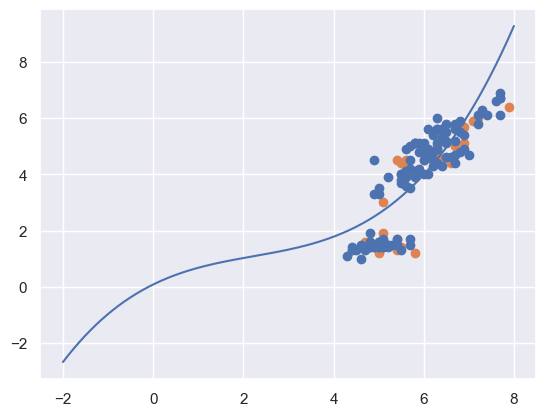

In [19]:
model.eval()
_x = torch.linspace(-2, 8, 1000)
_x = _x.reshape(-1, 1)
y_pred = model(_x.to(torch.device("mps"))).cpu().detach().numpy()
plt.plot(_x, y_pred)
plt.scatter(x_test, y_test, c="C1")
plt.scatter(x_train, y_train, c="C0")

In [85]:
A = np.vstack([x_train.reshape(-1), np.ones(len(x_train))]).T
A[:4]

array([[6.0999999 , 1.        ],
       [7.69999981, 1.        ],
       [5.5999999 , 1.        ],
       [6.4000001 , 1.        ]])

0.9903619766235352

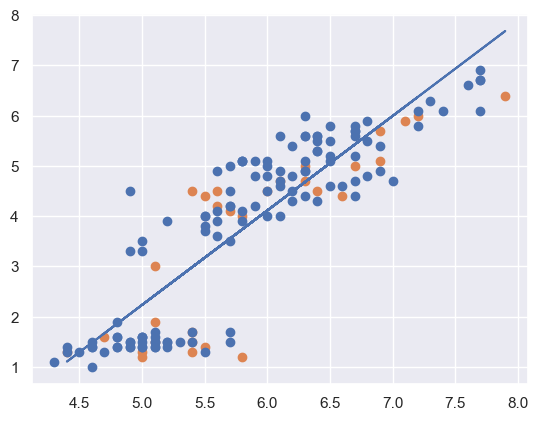

In [88]:
m, b = np.linalg.lstsq(A, y_train.reshape(-1), rcond=None)[0]
y_pred = x_test * m + b
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, c="C1")
plt.scatter(x_train, y_train, c="C0")
((y_test - y_pred)**2).sum() / len(y_test)